## 문제
- 주어진 데이터(data/insectsprays.csv)에는 여러 지역에서 스프레이를 뿌리기 전에 측정한 곤충의 수와 스프레이를 뿌린 다음의 곤충의 수가 저장되어 있다. 해당 스프레이가 구제 효과가 있는지(즉, 스프레이를 뿌린 뒤 곤충의 수가 감소했는지) 대응(쌍체)표본 t-검정(Paired t-test)을 통해 답하고자 한다.
- 문제 1. before_spr과 after_spr의 차이를 확인하여 diff 변수 로 저장한다.
- 문제 2. 가설을 설정한다. (귀무가설 & 대립가설)
- 문제 3. 정규성을 확인한다.
- 문제 4. 정규성을 만족하면 ttest 진행 후, t_score, p_value값을 구한다.
- 문제 5. 귀무가설 채택/기각 여부를 확인한다.
- 문제 6. pointplot() 그래프를 작성하여 시각화로 차이 여부를 추가로 확인한다.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('insectsprays.csv')
df.head()

,before_spr,after_spr
0,10,0
1,7,1
2,20,7
3,14,2
4,14,3


In [3]:
df['diff'] = df['after_spr'] - df['before_spr']
df.head()

,before_spr,after_spr,diff
0,10,0,-10
1,7,1,-6
2,20,7,-13
3,14,2,-12
4,14,3,-11


### 가설
- 귀무가설 : 스프레이를 뿌린 후는 전과 비교하여 곤충수 평균에 변화가 없다.=> 살충제 전후의 평균은 0이다
- 대립가설 : 스프레이를 뿌린 후는 전과 비교하여 변화가 있다. =>살충제 전후의 평균은 0이 아니다

In [5]:
#diff 정규성 확인 > 30개 이상이라 안해도 되긴 함 > 해보니, 정규성 만족못함
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   before_spr  36 non-null     int64
 1   after_spr   36 non-null     int64
 2   diff        36 non-null     int64
dtypes: int64(3)
memory usage: 992.0 bytes


In [16]:
from scipy import stats
statistic, p_value = stats.shapiro(df['diff'])
print(f"Statistic: {statistic}, p-value: {p_value}")

"""간단한 방법
from scipy.stats import shapiro
shapiro(diff)
"""

alpha = 0.05
if p_value > alpha:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Statistic: 0.9238725900650024, p-value: 0.016382716596126556
데이터는 정규 분포를 따르지 않습니다.


In [19]:
#t-test
from scipy.stats import stats

t_score, p_value = stats.ttest_rel(df['after_spr'], df['before_spr'])
print(round(t_score, 4), round(p_value, 4))

-14.8933 0.0


<ipython-input-19-a6a08a090539>:4: DeprecationWarning: Please use `ttest_rel` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_score, p_value = stats.ttest_rel(df['after_spr'], df['before_spr'])


- p-value가 0.05 보다 작으므로, 귀무가설 기각
- 곤충수 평균 변화에 유의미한 차이가 있다

### pointplot() 그래프를 작성하여 시각화로 차이 여부를 추가

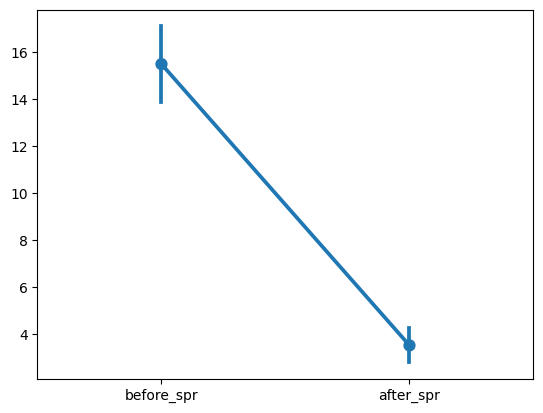

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pointplot(data = df[['before_spr', 'after_spr']])
plt.show()